In [1]:
#importing libraries
import numpy as np
import pandas as pd
import pyodbc
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
server = "LAPTOP-LDFSJBKN\\SQLEXPRESS"
database = 'inventory'
connection_string = f'mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'
engine = create_engine(connection_string)
conn = engine.connect()

In [3]:
df = pd.read_sql('inventory_tb', engine)
df.head()

,RegionName,CountryName,State,City,PostalCode,WarehouseAddress,WarehouseName,EmployeeName,EmployeeEmail,EmployeePhone,...,CustomerName,CustomerAddress,CustomerCreditLimit,CustomerEmail,CustomerPhone,Status,OrderDate,OrderItemQuantity,PerUnitPrice,TotalItemQuantity
0,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Summer Payne,summer.payne@example.com,5151238181,...,Flor Stone,2904 S Salina St,5000,flor.stone@raytheon.com,13171234104,Shipped,2016-11-17,132,469.989990,122
1,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Rose Stephens,rose.stephens@example.com,5151238080,...,Lavera Emerson,"5344 Haverford Ave, Philadelphia",5000,lavera.emerson@plainsallamerican.com,13171234111,Shipped,2017-02-20,124,519.989990,123
2,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Annabelle Dunn,annabelle.dunn@example.com,5151234444,...,Fern Head,"1795 Wu Meng, Muang Chonburi",1200,fern.head@usfoods.com,18121234115,Canceled,2017-01-03,92,800.739990,123
3,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Tommy Bailey,tommy.bailey@example.com,5151234567,...,Shyla Ortiz,"Walpurgisstr 69, Munich",2400,shyla.ortiz@abbvie.com,13171234126,Pending,2017-10-15,128,849.989990,124
4,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Blake Cooper,blake.cooper@example.com,5151234569,...,Jeni Levy,"Via Frenzy 6903, Roma",1200,jeni.levy@centene.com,18121214129,Shipped,2017-04-09,106,109.989998,125


In [4]:
#counting null 
df.isnull().sum()

RegionName             0
CountryName            0
State                  0
City                   0
PostalCode             0
WarehouseAddress       0
WarehouseName          0
EmployeeName           0
EmployeeEmail          0
EmployeePhone          0
EmployeeHireDate       0
EmployeeJobTitle       0
CategoryName           0
ProductName            0
ProductDescription     0
ProductStandardCost    0
Profit                 0
ProductListPrice       0
CustomerName           0
CustomerAddress        0
CustomerCreditLimit    0
CustomerEmail          0
CustomerPhone          0
Status                 0
OrderDate              0
OrderItemQuantity      0
PerUnitPrice           0
TotalItemQuantity      0
dtype: int64

In [5]:
df.dtypes

RegionName                     object
CountryName                    object
State                          object
City                           object
PostalCode                     object
WarehouseAddress               object
WarehouseName                  object
EmployeeName                   object
EmployeeEmail                  object
EmployeePhone                   int64
EmployeeHireDate       datetime64[ns]
EmployeeJobTitle               object
CategoryName                   object
ProductName                    object
ProductDescription             object
ProductStandardCost           float64
Profit                        float64
ProductListPrice              float64
CustomerName                   object
CustomerAddress                object
CustomerCreditLimit             int64
CustomerEmail                  object
CustomerPhone                   int64
Status                         object
OrderDate              datetime64[ns]
OrderItemQuantity               int64
PerUnitPrice

In [6]:
df.shape

(400, 28)

In [7]:
product = df.groupby('CategoryName', as_index=False).agg(
            total_cost_price = ('ProductStandardCost', 'sum'),
            total_sale_price = ('ProductListPrice', 'sum'),
            total_profit = ('Profit', 'sum'),
            total_OrderItemQuantity = ('OrderItemQuantity', 'sum'),
            total_ItemQuantity = ('TotalItemQuantity', 'sum')
)
product

,CategoryName,total_cost_price,total_sale_price,total_profit,total_OrderItemQuantity,total_ItemQuantity
0,CPU,111668.349670,136235.549133,24567.199932,8127,10972
1,Mother Board,23342.669968,29078.080170,5735.070004,6931,12415
2,RAM,174926.000000,189597.000000,14671.000000,3211,4678
3,Storage,335469.936530,346357.995933,10888.060026,11116,17726
4,Video Card,79654.859985,99690.899597,20036.149933,6311,3687


In [8]:
location = df.groupby(['CountryName', 'State'], as_index=False).agg(
            cost_price = ('ProductStandardCost', 'sum'),
            sales = ('ProductListPrice', 'sum'),
            profit = ('Profit', 'sum'),
            OrderItemQuantity = ('OrderItemQuantity', 'sum'),
            ItemQuantity = ('TotalItemQuantity', 'sum')
)
location

,CountryName,State,cost_price,sales,profit,OrderItemQuantity,ItemQuantity
0,Australia,New South Wales,119870.312508,121312.632580,1442.320014,3963,5541
1,Canada,Ontario,15050.520004,18868.519928,3817.829998,3854,6209
2,China,Beijing,174416.032471,184764.122437,10348.089996,4030,8461
3,India,Maharashtra,49508.070511,56646.460480,7138.219965,3709,8001
4,Mexico,Distrito Federal,190717.970778,202216.020793,11498.049993,4382,6686
5,United States of America,California,50789.640015,63329.339905,12539.699978,3758,1386
6,United States of America,New Jersey,34573.499878,43098.279602,8524.889961,4017,976
7,United States of America,Texas,64073.359863,78254.799438,14181.439957,4245,6448
8,United States of America,Washington,26062.410126,32469.349670,6406.940033,3738,5770


In [9]:
warehouse = df.groupby(['CountryName','WarehouseName'], as_index=False).agg(
            Cost_Price = ('ProductStandardCost', 'sum'),
            Sales = ('ProductListPrice', 'sum'),
            Profit = ('Profit', 'sum'),
            Order_ItemQuantity = ('OrderItemQuantity', 'sum'),
            Stored_ItemQuantity = ('TotalItemQuantity', 'sum')
)
warehouse

,CountryName,WarehouseName,Cost_Price,Sales,Profit,Order_ItemQuantity,Stored_ItemQuantity
0,Australia,Sydney,119870.312508,121312.632580,1442.320014,3963,5541
1,Canada,Toronto,15050.520004,18868.519928,3817.829998,3854,6209
2,China,Beijing,174416.032471,184764.122437,10348.089996,4030,8461
3,India,Bombay,49508.070511,56646.460480,7138.219965,3709,8001
4,Mexico,Mexico City,190717.970778,202216.020793,11498.049993,4382,6686
5,United States of America,New Jersy,34573.499878,43098.279602,8524.889961,4017,976
6,United States of America,San Francisco,50789.640015,63329.339905,12539.699978,3758,1386
7,United States of America,Seattle Washington,26062.410126,32469.349670,6406.940033,3738,5770
8,United States of America,Southlake Texas,64073.359863,78254.799438,14181.439957,4245,6448


In [10]:
delivery = df.groupby(['Status'], as_index=False).agg(
            Order_ItemQuantity = ('OrderItemQuantity', 'sum'),
)
delivery

,Status,Order_ItemQuantity
0,Canceled,9456
1,Pending,9413
2,Shipped,16827


In [11]:
profit_emp = df.groupby('EmployeeJobTitle', as_index=False).agg(
            Profit = ('Profit', 'sum')
)
profit_emp

,EmployeeJobTitle,Profit
0,Accountant,4560.550003
1,Accounting Manager,1153.459984
2,Administration Assistant,1042.889984
3,Administration Vice President,2060.029976
4,Finance Manager,1074.559994
5,Human Resources Representative,1028.859982
6,Marketing Manager,997.659996
7,Marketing Representative,716.429996
8,President,924.040001
9,Programmer,5094.930014


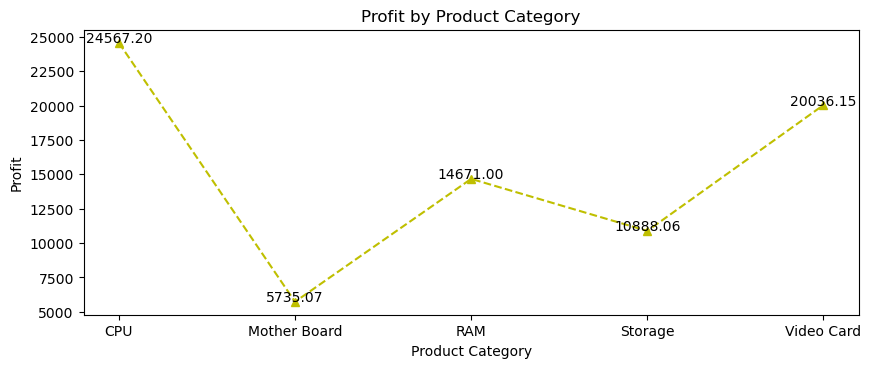

In [12]:
#Profit by Product Category graph
fig = plt.figure(figsize=(10,3.7))
plt.plot(product['CategoryName'], product['total_profit'], marker='^',linestyle='--', color='y')
for x, y in zip(product['CategoryName'], product['total_profit']):
    plt.text(x, y, f"{y:.2f}", fontsize=10, horizontalalignment='center')
plt.title("Profit by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Profit")
plt.show()

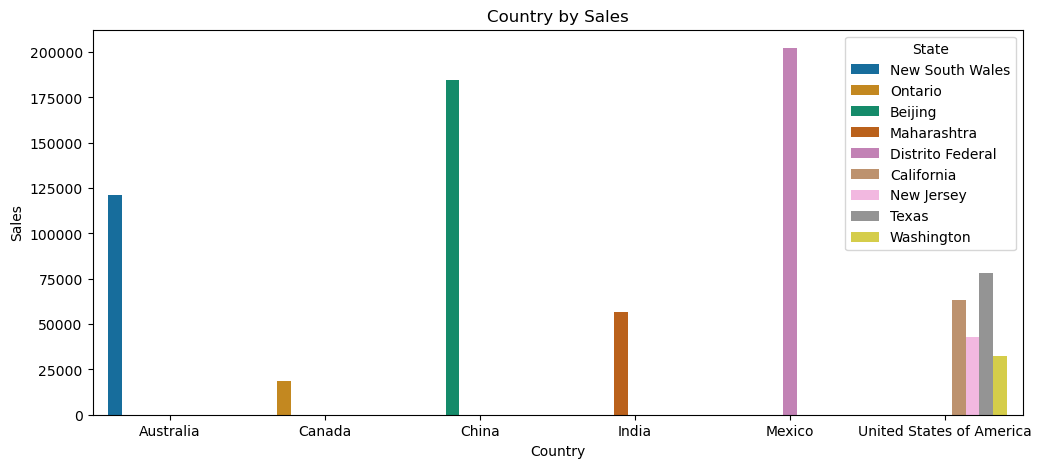

In [13]:
#Country by Sales graph
fig = plt.figure(figsize=(12,5))
color_palette = sn.color_palette('colorblind',9)
sn.barplot(x = 'CountryName',
            y = 'sales',
            hue = 'State',
            data = location,
            palette = color_palette)

plt.title("Country by Sales")
plt.xlabel("Country")
plt.ylabel("Sales")
plt.show()

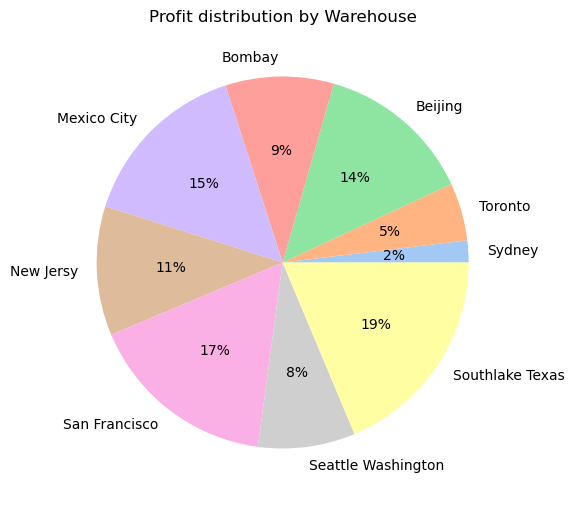

In [14]:
#Profit distribution by Warehouse graph
fig = plt.figure(figsize=(6,8))
palette_color = sn.color_palette('pastel') 
plt.pie(warehouse['Profit'], labels=warehouse['WarehouseName'], colors=palette_color, autopct='%.0f%%')
plt.title("Profit distribution by Warehouse")
plt.show()

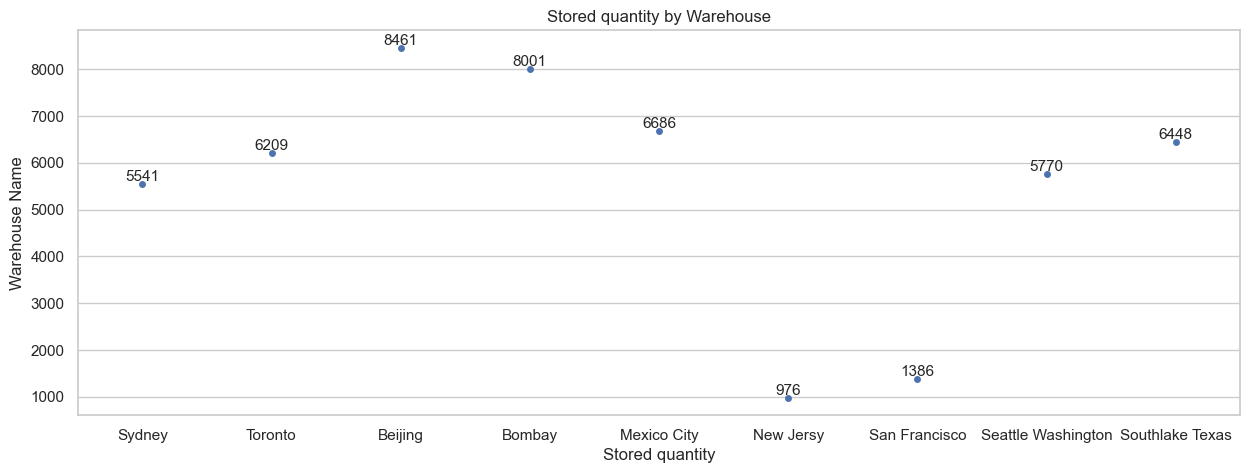

In [15]:
#Stored quantity by Warehouse graph
fig = plt.figure(figsize=(15,5))
#palette_color = sn.color_palette('bright') 
sn.set(style="whitegrid")
ax = sn.stripplot(x='WarehouseName', y='Stored_ItemQuantity', data=warehouse); 
for x, y in zip(warehouse['WarehouseName'], warehouse['Stored_ItemQuantity']):
    plt.text(x, y, f"{y}", fontsize=11, horizontalalignment='center', verticalalignment='bottom')
ax.set(xlabel ='Stored quantity', ylabel ='Warehouse Name')
plt.title("Stored quantity by Warehouse")
plt.show()

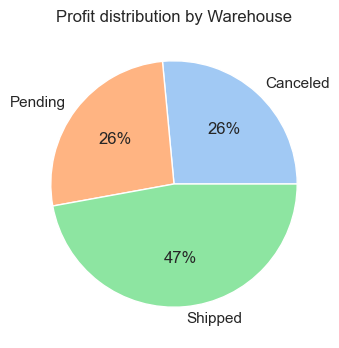

In [16]:
#Profit distribution by Warehouse graph
fig = plt.figure(figsize=(4,4))
palette_color = sn.color_palette('pastel') 
plt.pie(delivery['Order_ItemQuantity'], labels=delivery['Status'], colors=palette_color, autopct='%.0f%%')
plt.title("Profit distribution by Warehouse")
plt.show()

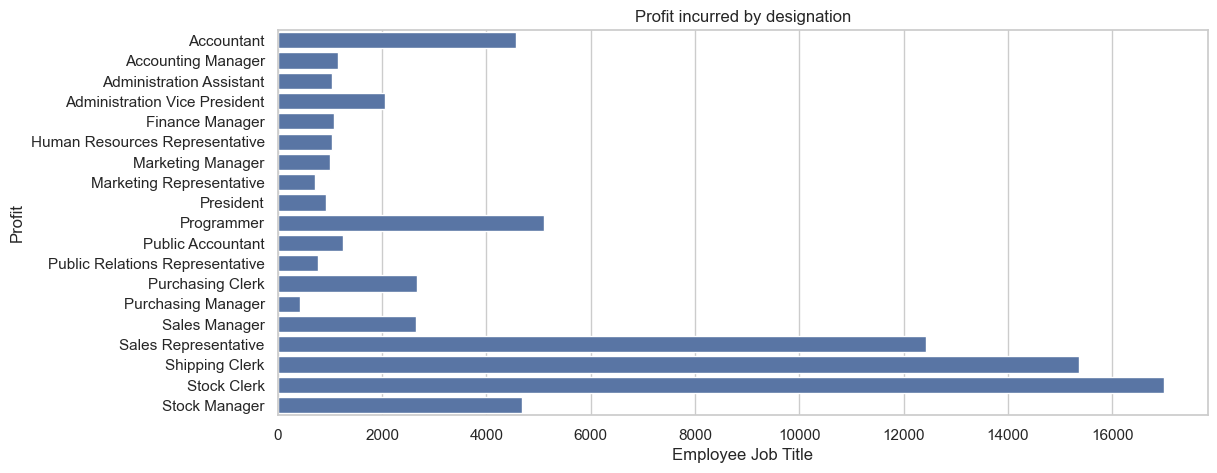

In [18]:
#Profit incurred by designation graph
fig = plt.figure(figsize=(12,5))
#color_palette = sn.color_palette('muted')
sn.barplot(x = 'Profit',
            y = 'EmployeeJobTitle', 
            data = profit_emp,
            #palette = color_palette,
            orient = 'h')

plt.title("Profit incurred by designation")
plt.xlabel("Employee Job Title")
plt.ylabel("Profit")
plt.show()